In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
#################################### 한글깨짐 ####################################
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")
##################################################################################

In [3]:
train = pd.read_csv("../bike-sharing-demand/train.csv", parse_dates=["datetime"])
test = pd.read_csv("../bike-sharing-demand/test.csv", parse_dates=["datetime"])

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  hour        10886 non-null  int64         
 15  dayofweek   10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [4]:
# datetime컬럼 정리
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek

In [11]:
train[train['season']==1].month
train[train['season']==2].month
train[train['season']==3].month
train[train['season']==4].month

4055     10
4056     10
4057     10
4058     10
4059     10
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: month, Length: 2734, dtype: int64

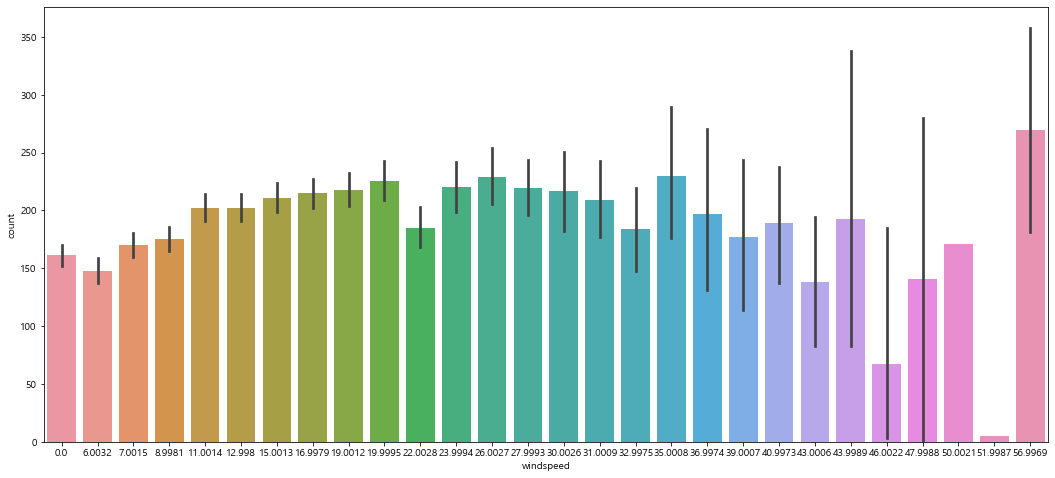

In [12]:
figure, axes = plt.subplots() #구역나누기
figure.set_size_inches(18,8) # figure사이즈설정
sns.barplot(data=train, x='windspeed', y='count', ax=axes) # count 컬럼의 합계값이 plot에 나온다

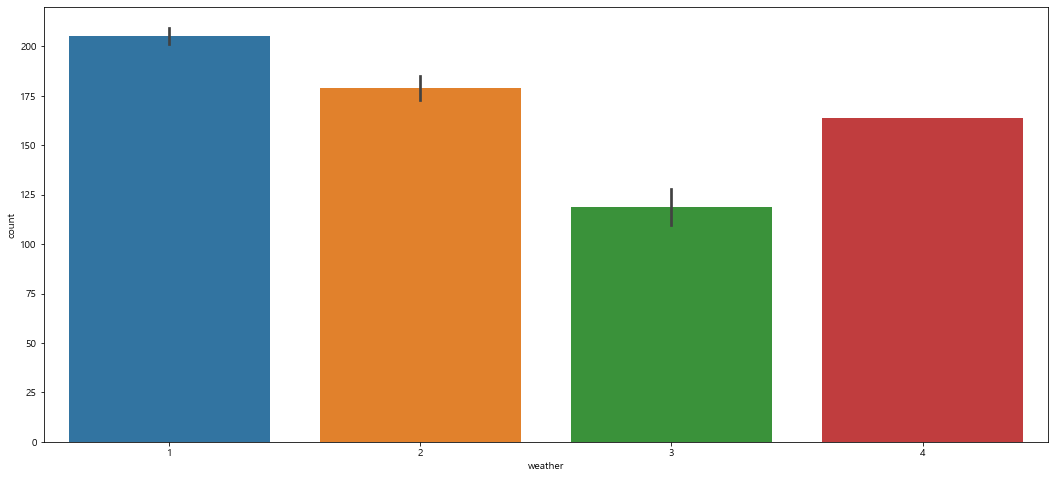

In [14]:
figure, axes = plt.subplots() #구역나누기
figure.set_size_inches(18,8) # figure사이즈설정
sns.barplot(data=train, x='weather', y='count', ax=axes) # count 컬럼의 합계값이 plot에 나온다

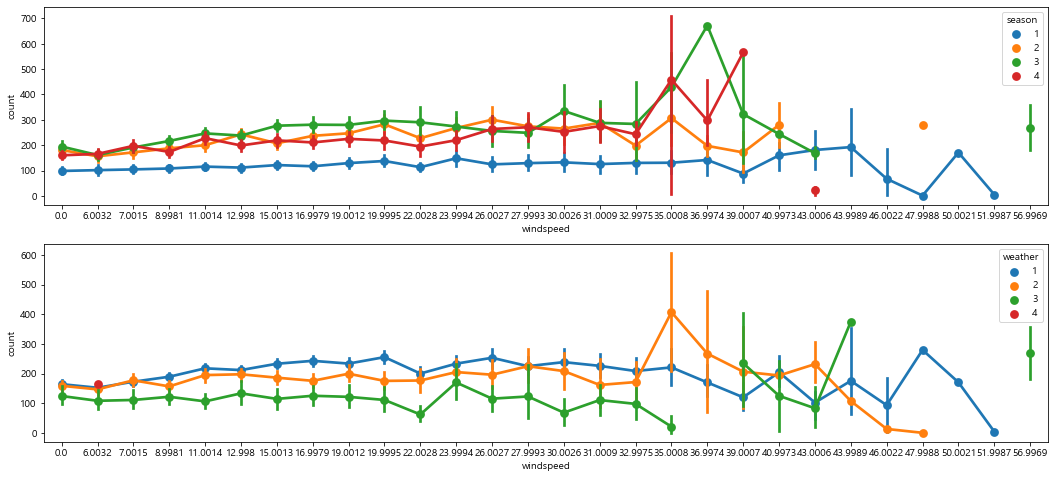

In [6]:
figure, axes = plt.subplots(nrows=2) #구역나누기
figure.set_size_inches(18,8) # figure사이즈설정
sns.pointplot(data=train, x='windspeed', y='count',hue='season', ax=axes[0]) # count 컬럼의 합계값이 plot에 나온다
sns.pointplot(data=train, x='windspeed', y='count',hue='weather', ax=axes[1])

In [5]:
train.windspeed.unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

In [13]:
train[train.windspeed==56.9969]
# test[test.windspeed==56.9969]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
2755,2011-07-03 17:00:00,3,0,0,3,32.8,37.12,49,56.9969,181,177,358,2011,7,17,6
2756,2011-07-03 18:00:00,3,0,0,3,32.8,37.12,49,56.9969,74,107,181,2011,7,18,6
